In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge04/data.csv')
df

,Year,Slave,Free
0,1790,92.0,8.0
1,1800,88.0,11.0
2,1810,86.5,13.5
3,1820,87.0,13.0
4,1830,86.0,14.0
5,1840,87.0,13.0
6,1850,88.0,12.0
7,1860,89.0,11.0
8,1870,0.0,100.0


In [3]:
# Gather information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9 non-null      int64  
 1   Slave   9 non-null      float64
 2   Free    9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 344.0 bytes


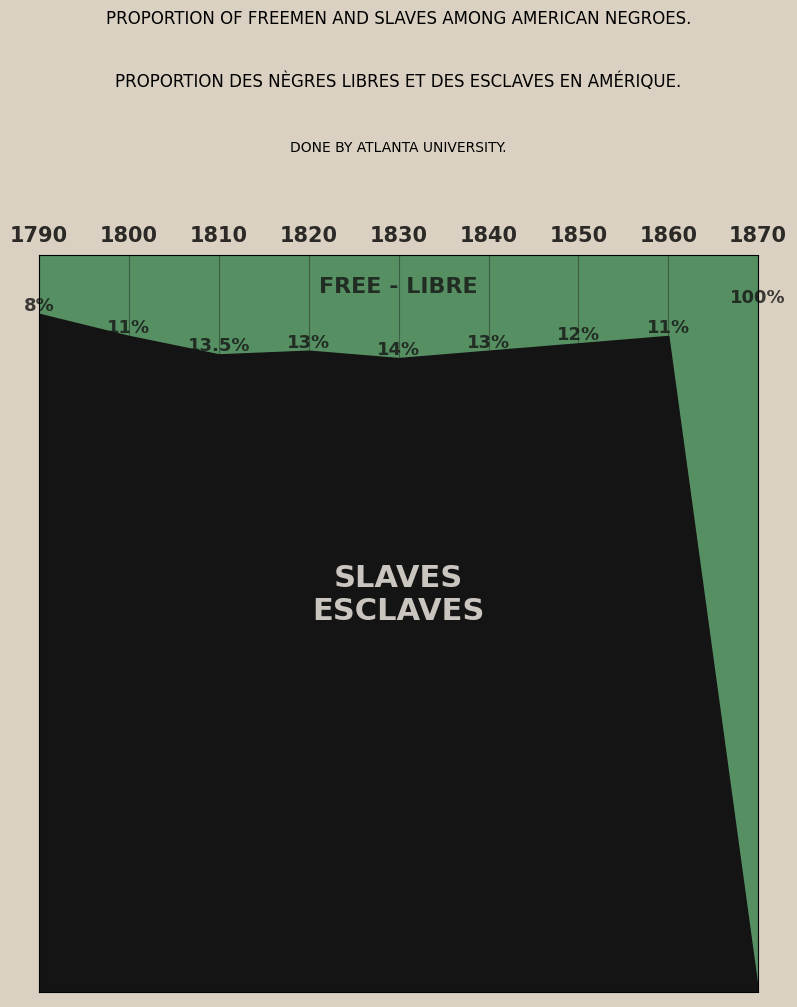

In [4]:
# Create figure and set background color
fig, ax = plt.subplots(figsize=(7.99, 10.24), facecolor='#dad1c2')

# Adjust Axes to occupy 90% width 
ax.set_position([0.05, 0.02, 0.9, 0.72])  

# Set y-axis limits and flip y axis
ax.set_ylim([100, 0])

# Set x-axis limits
ax.set_xlim([1790, 1870])

# Set the location of tick labels
ax.tick_params(labelbottom=False, labeltop=True, labelleft=False, labelright=False, color ='#141414')

# Set font for ticklabels
for tick in ax.xaxis.get_majorticklabels():
    tick.set_fontsize(15)
    tick.set_fontweight('bold')
    tick.set_alpha(0.8)

# Remove ticks
ax.tick_params(axis='both', which='both', width=0)

# Fill area for the upper boundary
ax.fill_between(df['Year'], df['Free'], 0, color = '#568f62')

# Fill area for the lower boundary
ax.fill_between(df['Year'], 100, df['Free'], color = '#141414')

# Set vertical lines
ax.grid(visible=True, which='major', axis='x', color ='#141414', alpha=0.4)

# Add labels with specified format
for i, free in enumerate(df['Free']):
    # Check if the value has no decimals, if so format as integer, else as float with one decimal
    if free.is_integer():
        label = f"{int(free)}%"
    else:
        label = f"{free:.1f}%"

    # Adjust y position of last label
    if free == 100.0:
        y_position = i -1
    else:
        y_position = free
       
    # Place text label at specific position 
    ax.text(df['Year'][i], y_position, label, ha='center', va='bottom', fontsize=13, fontweight='bold', color='#141414', alpha=0.8, zorder=2)

# Text annotaions
ax.text(x=1830, y=4.2, ha='center', va='center', s='FREE - LIBRE', fontsize=16, fontweight='bold', color='#141414', alpha=0.8, zorder=3)
ax.text(x=1830, y=46, ha='center', va='center', s='SLAVES\nESCLAVES', fontsize=22, fontweight='bold', color='#cbc5bf', zorder=3)

# Adding a Title and Subtitle
plt.suptitle('PROPORTION OF FREEMEN AND SLAVES AMONG AMERICAN NEGROES.\n\n\n''PROPORTION DES NÈGRES LIBRES ET DES ESCLAVES EN AMÉRIQUE.', 
             y=0.98, va='top')
plt.title('DONE BY ATLANTA UNIVERSITY.', fontsize=10, pad=75)

   
# Save the figure
plt.savefig("plate51.jpg")

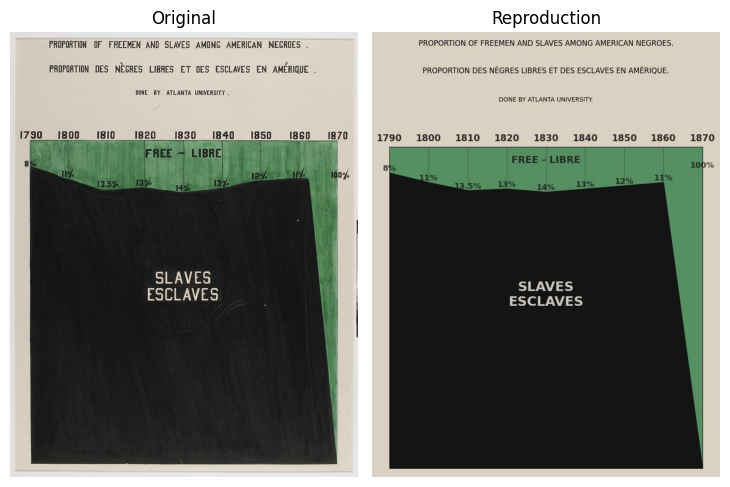

In [5]:
# Load the images
image1 = Image.open("/kaggle/input/dubois-data-portrait-challenge/challenge-only/challenge04/original-plate-51.jpg")
image2 = Image.open("plate51.jpg")

# Convert the images to a numpy array 
image_np1 = np.array(image1)
image_np2 = np.array(image2)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.4, 10.5))

# Left subplot
ax1.imshow(image_np1)
# Turn off axis for the image
ax1.axis('off')  
# Set title
ax1.set_title('Original')

# Right subplot
ax2.imshow(image_np2)
# Turn off axis for the image
ax2.axis('off')  
# Set title
ax2.set_title('Reproduction')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()